<a href="https://colab.research.google.com/github/Jamie10X/CancerDiagnosisAIProject/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NaNs in X before replacement: 146132693
NaNs in X after replacement: 0
Epoch 1/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.6781 - loss: 1.3343 - val_accuracy: 0.8215 - val_loss: 0.9287
Epoch 2/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.8340 - loss: 0.7792 - val_accuracy: 0.8927 - val_loss: 0.4124
Epoch 3/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 140s 52ms/step - accuracy: 0.9032 - loss: 0.3701 - val_accuracy: 0.9335 - val_loss: 0.2383
Epoch 4/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 146s 55ms/step - accuracy: 0.9402 - loss: 0.2238 - val_accuracy: 0.9632 - val_loss: 0.1534
Epoch 5/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 139s 53ms/step - accuracy: 0.9654 - loss: 0.1446 - val_accuracy: 0.9782 - val_loss: 0.1029
Epoch 6/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 143s 53ms/step - accuracy: 0.9810 - loss: 0.0984 - val_accuracy: 0.9897 - val_loss: 0.0707
Epoch 7/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.9905 - loss: 0.0659 - val_accuracy: 0.9953 - val_loss: 0.0491


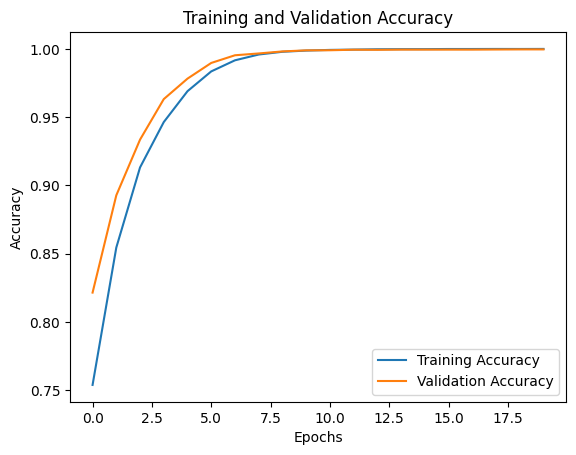

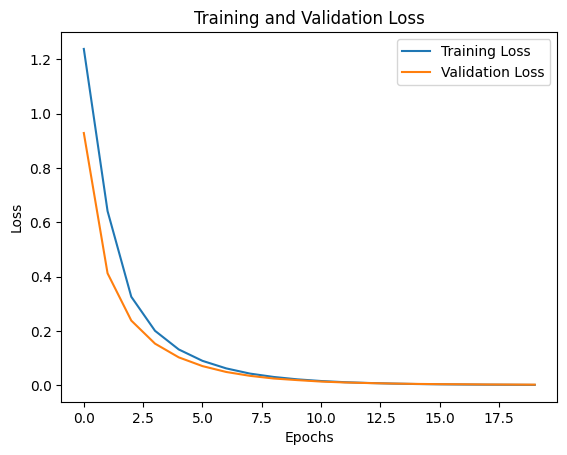

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load and Combine Datasets
# Load each dataset and add a label column
brca_data = pd.read_csv('/content/cancer/TCGA_BRCA.csv')
brca_data['CancerType'] = 'BRCA'

coad_data = pd.read_csv('/content/cancer/TCGA_COAD.csv')
coad_data['CancerType'] = 'COAD'

luad_data = pd.read_csv('/content/cancer/TCGA_LUAD.csv')
luad_data['CancerType'] = 'LUAD'

thca_data = pd.read_csv('/content/cancer/TCGA_THCA.csv')
thca_data['CancerType'] = 'THCA'

# Concatenate all datasets into one
combined_data = pd.concat([brca_data, coad_data, luad_data, thca_data], ignore_index=True)

# Step 2: Separate Features and Labels
X = combined_data.drop(columns=['CancerType'])
y = combined_data['CancerType']

# Step 3: Encode Labels and Normalize Features
# Label encoding and one-hot encoding for labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encodes as integers
y_onehot = pd.get_dummies(y_encoded).values  # One-hot encode

# Check for and handle NaN values in X
print("NaNs in X before replacement:", np.isnan(X).sum().sum())
X = X.fillna(X.mean())  # Replace NaNs with column means
print("NaNs in X after replacement:", np.isnan(X).sum().sum())

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# Step 4: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

# Step 5: Define the FNN Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),     # Input layer with feature count
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')        # Output layer with 4 classes
])

# Step 6: Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for stability
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the Model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Step 8: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 9: Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)   # Convert one-hot to class labels
y_pred_labels = np.argmax(y_pred, axis=1)   # Convert predictions to class labels

print(confusion_matrix(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_))

# Step 10: Plot Training and Validation Loss and Accuracy
# Plotting Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()